In [3]:
# importing required libraries

import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df = pd.read_csv("/content/Krish_Niak_YT_Stats.csv")

In [5]:
df.head()

,video_id,Title,Published_at,Views,Likes,Description,Tags,duration,subscribers
0,1ICRLYtkmNU,Generative AI Google Gemini Pro Crash Course W...,2024-01-12T03:22:07Z,1012,214,https://github.com/krishnaik06/Google-Gemini-C...,"['yt:cc=on', 'google gemini pro', 'end to end ...",PT2H16M35S,865000
1,Vlz4wLWGQdU,Mind Blowing Student Support System By @iNeuro...,2024-01-10T06:41:25Z,5128,221,Visit https://support.ineuron.ai\nCheck out Al...,[],PT16M8S,865000
2,uus5eLz6smA,Chat With Multiple PDF Documents With Langchai...,2024-01-09T06:37:38Z,11228,335,github: https://github.com/krishnaik06/Complet...,"['yt:cc=on', 'chat with multiple pdfs', 'gener...",PT29M21S,865000
3,SHLyTry7QqI,Perfect Roadmap To Learn Data Science With Fre...,2024-01-06T15:38:45Z,5068,492,Support me by joining membership so that I can...,"['data science roadmap 2024', 'machine learnin...",PT50S,865000
4,gQRYqlFQNK8,Complete Roadmap To Become Data Analyst In 202...,2024-01-05T13:02:54Z,22261,779,Data analyst Roadmap : https://github.com/kris...,"['yt:cc=on', 'data analyst 2024', 'machine lea...",PT25M18S,865000


In [6]:
df.shape

(1711, 9)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

video_id         0
Title            0
Published_at     0
Views            0
Likes            0
Description     16
Tags             0
duration         0
subscribers      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_id      1711 non-null   object
 1   Title         1711 non-null   object
 2   Published_at  1711 non-null   object
 3   Views         1711 non-null   int64 
 4   Likes         1711 non-null   int64 
 5   Description   1695 non-null   object
 6   Tags          1711 non-null   object
 7   duration      1711 non-null   object
 8   subscribers   1711 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 120.4+ KB


In [10]:
# Extracting Required columns

df = df[["video_id","Title","Tags","Published_at","Views","Likes","duration","subscribers"]]

In [11]:
df

,video_id,Title,Tags,Published_at,Views,Likes,duration,subscribers
0,1ICRLYtkmNU,Generative AI Google Gemini Pro Crash Course W...,"['yt:cc=on', 'google gemini pro', 'end to end ...",2024-01-12T03:22:07Z,1012,214,PT2H16M35S,865000
1,Vlz4wLWGQdU,Mind Blowing Student Support System By @iNeuro...,[],2024-01-10T06:41:25Z,5128,221,PT16M8S,865000
2,uus5eLz6smA,Chat With Multiple PDF Documents With Langchai...,"['yt:cc=on', 'chat with multiple pdfs', 'gener...",2024-01-09T06:37:38Z,11228,335,PT29M21S,865000
3,SHLyTry7QqI,Perfect Roadmap To Learn Data Science With Fre...,"['data science roadmap 2024', 'machine learnin...",2024-01-06T15:38:45Z,5068,492,PT50S,865000
4,gQRYqlFQNK8,Complete Roadmap To Become Data Analyst In 202...,"['yt:cc=on', 'data analyst 2024', 'machine lea...",2024-01-05T13:02:54Z,22261,779,PT25M18S,865000
...,...,...,...,...,...,...,...,...
1706,MTiaCUh1420,Important libraries used in python Data Scienc...,"['Machine Learning', 'Artificial Intelligence'...",2017-11-26T07:48:27Z,21062,183,PT8M31S,865000
1707,DeT8mji0Jos,Anaconda installation with Packages- Machine L...,"['Machine Learning', 'Artificial Intelligence'...",2017-11-26T06:16:34Z,77102,353,PT5M18S,865000
1708,HrHJUc26YxI,What is Supervised Machine Learning- Machine L...,"['Machine Learning basics', 'Artificial Intell...",2017-11-26T04:50:08Z,36001,405,PT11M42S,865000
1709,EqRsD3gqeCo,What is Machine Learning in Data Science- Mach...,"['Machine learning basics and types', 'Data Sc...",2017-11-25T12:27:20Z,145674,889,PT10M,865000


## **Explorartory Data Analysis**

In [12]:
# converting datatypes from object to datetiem for PublishedAT column

df["Published_at"] = pd.to_datetime(df["Published_at"])

<ipython-input-12-3798f9145ebc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Published_at"] = pd.to_datetime(df["Published_at"])


In [13]:
!pip install isodate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.3 MB/s eta 0:00:00


In [14]:
from isodate import parse_duration

df['duration'] = df['duration'].apply(lambda x: parse_duration(x))

df['duration'] = df['duration'].astype("timedelta64[s]")

In [15]:
# renaming duration to duration_seconds

df.rename(columns = { "duration" : "duration_seconds"} , inplace = True)

In [16]:
df[["Title" , "duration_seconds"]].head(2)

,Title,duration_seconds
0,Generative AI Google Gemini Pro Crash Course W...,8195.0
1,Mind Blowing Student Support System By @iNeuro...,968.0


In [17]:
# Tags used in each videos

df["tag_count"] = df["Tags"].apply(lambda x: len(x.split(', ')))

In [18]:
df[["Tags","tag_count"]].head(2)

,Tags,tag_count
0,"['yt:cc=on', 'google gemini pro', 'end to end ...",9
1,[],1


In [19]:
# extracting date,year,time and month from publishedAt column

df["upload_date"] = df["Published_at"].dt.date #date

df["upload_year"] = df["Published_at"].dt.year  #year

df["upload_month"] = df["Published_at"].dt.month_name()  #month

df["upload_day"] = df["Published_at"].dt.day_name()  #weekday

df["upload_time"] = df["Published_at"].dt.time   #time

In [20]:
df[["upload_year","upload_month","upload_day","upload_date","upload_time"]].sample(4)

,upload_year,upload_month,upload_day,upload_date,upload_time
204,2022,October,Thursday,2022-10-13,07:24:46
581,2021,July,Saturday,2021-07-24,04:45:13
240,2022,August,Saturday,2022-08-27,12:08:23
303,2022,June,Sunday,2022-06-05,11:42:25


In [21]:
df.sample(5)

,video_id,Title,Tags,Published_at,Views,Likes,duration_seconds,subscribers,tag_count,upload_date,upload_year,upload_month,upload_day,upload_time
376,cGez1q4iOFU,Live Day 2-Live Session On EDA And Feature Eng...,"['yt:cc=on', 'eda tutorial', 'feature engineer...",2022-02-18 15:40:13+00:00,75647,2976,4649.0,865000,5,2022-02-18,2022,February,Friday,15:40:13
358,I853fRFvYcY,Motivational Stories From iNeuron Meet Up,"['yt:cc=on', 'ineuron meet up', 'data science'...",2022-03-14 12:37:49+00:00,6488,214,599.0,865000,5,2022-03-14,2022,March,Monday,12:37:49
901,y7k-zCvOYxc,500+ Machine Learning And Deep Learning Projec...,"['deep learning projects github', 'deep learni...",2021-01-03 11:43:05+00:00,155936,6611,469.0,865000,13,2021-01-03,2021,January,Sunday,11:43:05
1520,UsglokDLa2o,"Tutorial 9- Seaborn Tutorial- Distplot, Joinpl...","['Pandas', 'Machine Learning', 'Seaborn Tutori...",2019-10-02 09:28:57+00:00,128124,2280,1303.0,865000,10,2019-10-02,2019,October,Wednesday,09:28:57
1160,Vu87-pxg2s4,Guidance Towards Data Science|Panel Discussion...,"['data science tutorial javatpoint', 'data sci...",2020-06-08 13:30:12+00:00,13743,732,4209.0,865000,11,2020-06-08,2020,June,Monday,13:30:12


In [22]:
sns.set(style='dark')

# **Q) Top 5 Most viewed Videos**

In [23]:
#top 5 videos as per view count

top_5 = df[["Title","Views","upload_year","duration_seconds"]].sort_values("Views" , ascending = False).head(5)

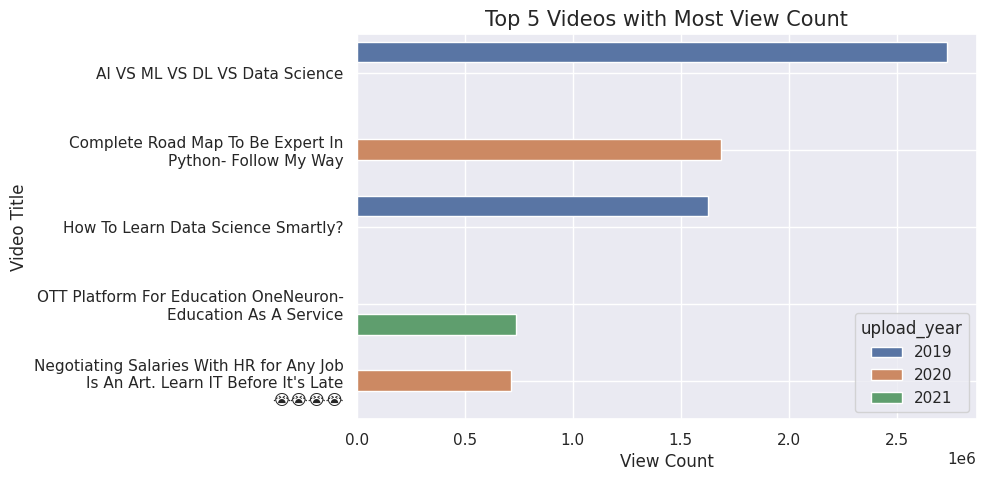

In [24]:
plt.figure(figsize = (8,5))

import textwrap
wrapped_titles = [textwrap.fill(title, width=40) for title in top_5["Title"]]

sns.barplot(data = top_5 , y = wrapped_titles , x = "Views" , hue = "upload_year")

plt.title("Top 5 Videos with Most View Count", fontsize = 15)
plt.xlabel("View Count")
plt.ylabel("Video Title")

plt.grid()
plt.show()

# **Q) Top 5 most liked videos**

In [25]:
like_5 = df[["Title", "Likes", "upload_year", "duration_seconds"]].sort_values("Likes" , ascending = False).head(5)

like_5

,Title,Likes,upload_year,duration_seconds
1458,AI VS ML VS DL VS Data Science,65733,2019,585.0
1576,How To Learn Data Science Smartly?,51868,2019,733.0
1567,How To Learn Data Science by Self Study and Fo...,28005,2019,1017.0
1018,Complete Road Map To Be Expert In Python- Foll...,18715,2020,1751.0
908,Negotiating Salaries With HR for Any Job Is An...,16125,2020,522.0


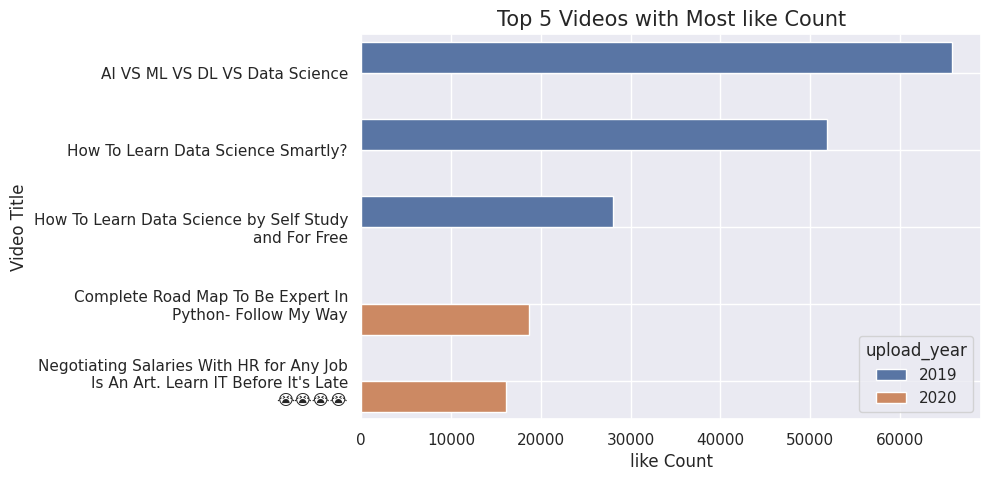

In [26]:
plt.figure(figsize = (8,5))

import textwrap
wrapped_titles = [textwrap.fill(title, width=40) for title in like_5["Title"]]

sns.barplot(data = like_5 , y = wrapped_titles , x = "Likes" , hue = "upload_year")

plt.title("Top 5 Videos with Most like Count", fontsize = 15)
plt.xlabel("like Count")
plt.ylabel("Video Title")

plt.grid()
plt.show()

# **Q) How Does Total View Count Vary Over Years?**

In [27]:
yearly_view = df.groupby("upload_year")["Views"].sum().reset_index()

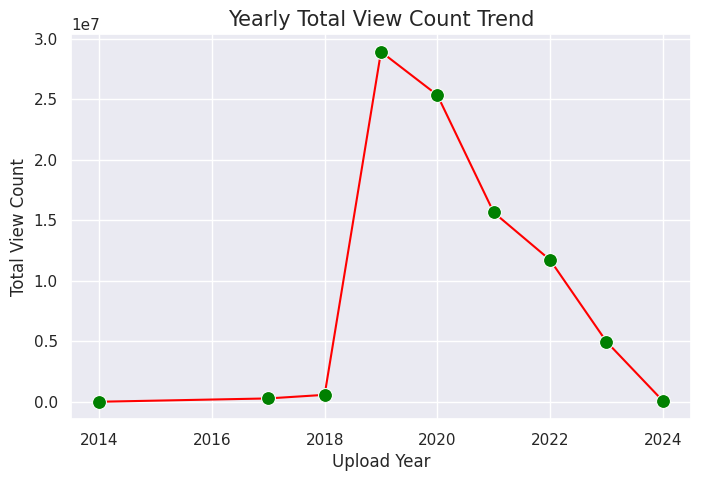

In [28]:
#plotting the line graph

plt.figure(figsize = (8,5))

sns.lineplot(data = yearly_view , x = "upload_year" , y = "Views" ,marker = "o" , color = "red" , markerfacecolor = "green" , markersize = 10)

plt.title("Yearly Total View Count Trend",fontsize = 15)
plt.xlabel("Upload Year")
plt.ylabel("Total View Count")

plt.grid()
plt.show()

# **Q) Number of videos uploaded on the YouTube channel changed over the years?**

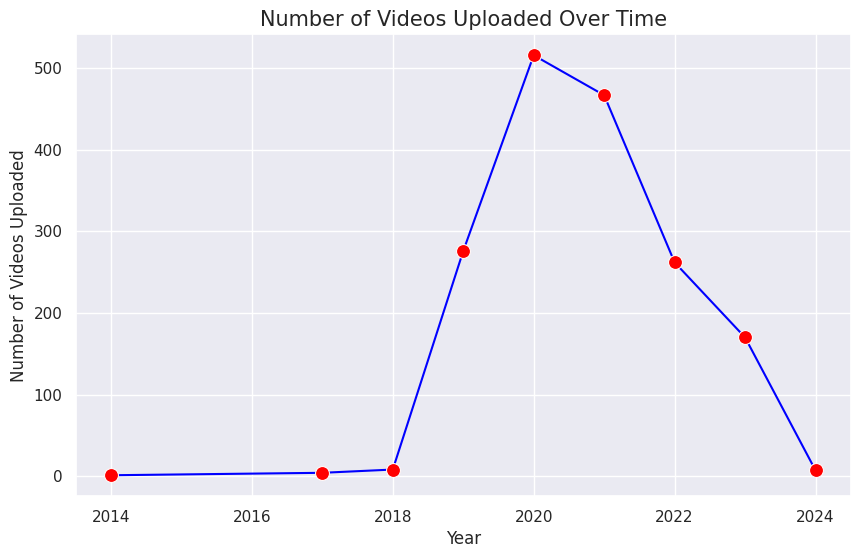

In [29]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df.groupby(df["upload_year"])["upload_month"].count(), marker="o", color="blue", markerfacecolor = "red" , markersize = 10)

plt.title("Number of Videos Uploaded Over Time", fontsize = 15)
plt.xlabel("Year")
plt.ylabel("Number of Videos Uploaded")

plt.grid()
plt.show()


# **Q) When are the Majority of Videos Uploaded?**

In [30]:

def upload_timings(upload_time):
    if 5 <= upload_time.hour < 12:
        return 'Morning'
    elif 12 <= upload_time.hour < 17:
        return 'Afternoon'
    elif 17 <= upload_time.hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_slot'] = df['upload_time'].apply(upload_timings)

In [31]:
time_slot_counts = df['time_slot'].value_counts()
time_slot_counts

Afternoon    1002
Morning       454
Night         158
Evening        97
Name: time_slot, dtype: int64

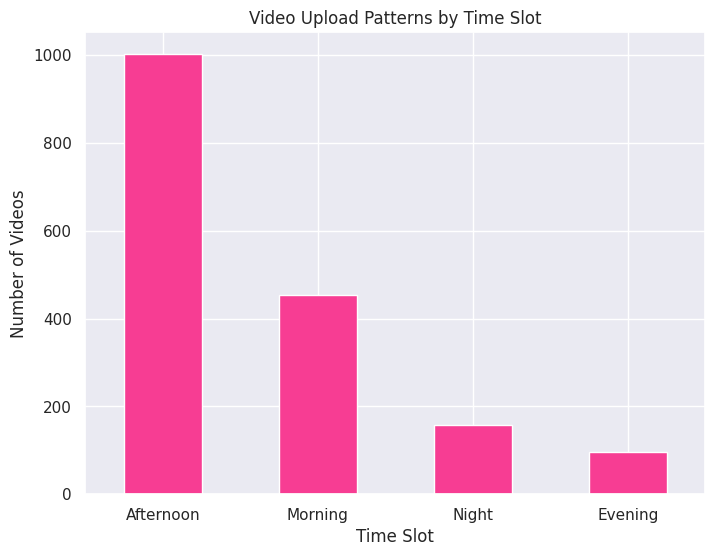

In [32]:
plt.figure(figsize=(8, 6))

time_slot_counts.plot(kind='bar', color='#F73D93')

plt.xlabel('Time Slot')
plt.ylabel('Number of Videos')
plt.title('Video Upload Patterns by Time Slot')
plt.xticks(rotation=0)

plt.grid()
plt.show()

# **Q) How many videos were uploaded on each day of the week?**

In [33]:
day_counts = df['upload_day'].value_counts()

day_counts

Friday       265
Saturday     251
Wednesday    245
Thursday     242
Sunday       238
Monday       236
Tuesday      234
Name: upload_day, dtype: int64

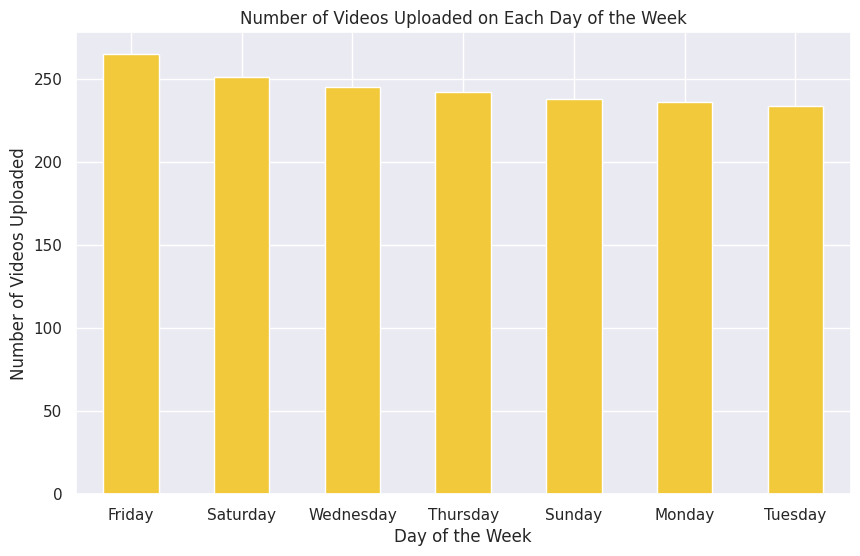

In [34]:
plt.figure(figsize=(10, 6))

day_counts.plot(kind='bar', color='#F1C93B')

plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos Uploaded')
plt.title('Number of Videos Uploaded on Each Day of the Week')
plt.xticks(rotation=0)

plt.grid()
# Show the plot
plt.show()

# **Q) Relationship between the number of tags and average view count?**

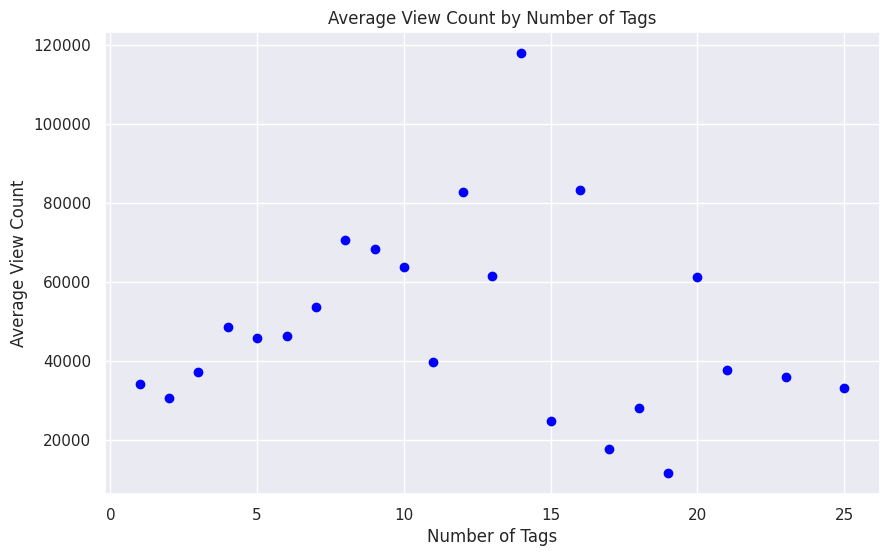

In [35]:
avg_view_by_tags = df.groupby('tag_count')['Views'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(avg_view_by_tags['tag_count'], avg_view_by_tags['Views'], color='blue')

plt.title('Average View Count by Number of Tags')
plt.xlabel('Number of Tags')
plt.ylabel('Average View Count')


plt.grid()
plt.show()

# **Q) What is the Most Frequent Word Used in Titles?**

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

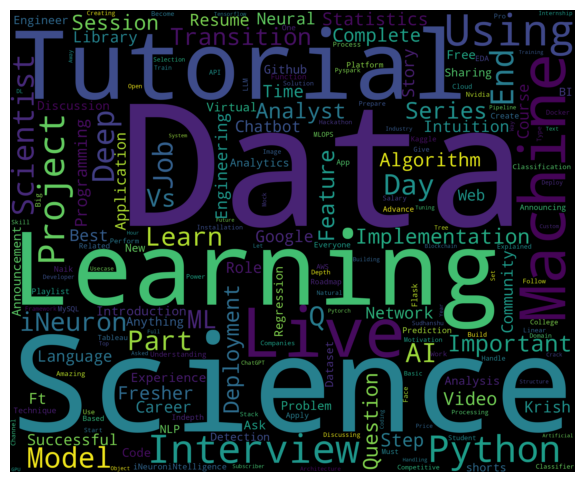

In [37]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Removing stopwords from titles
stop_words = set(stopwords.words("english"))
df["title_no_stopwords"] = df["Title"].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Combining all titles into a single string
all_words_str = ' '.join(df["title_no_stopwords"].tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=2200, height=1800, random_state=1, collocations=False).generate(all_words_str)

# Define a function to plot the word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_cloud(wordcloud)

In [38]:

# exporting csv file

df.to_csv("Krish_Naik_BI.csv", index = False)

# **SHORT VIDEOS**

# **Q) How many Short Videos are uploaded?**

In [39]:
from datetime import date

In [40]:
short_videos = df[ (df["upload_date"] > date(2020,9,1)) & (df['duration_seconds'] <= 60.0) ]

short_videos.shape

(43, 16)

In [41]:
# extracting required columns

short_videos = short_videos[["Title","Views","Likes","duration_seconds","upload_year","upload_month","upload_time"]]

short_videos.sample(5)

,Title,Views,Likes,duration_seconds,upload_year,upload_month,upload_time
470,Live Resume Reviews Session Announcent,10132,420,57.0,2021,November,08:30:00
374,Happy Birthday Python Programming Language🥳🥳🥳🥳,18974,1018,37.0,2022,February,08:30:16
156,Will ChatGPT Take Our Jobs? #shorts,18639,1010,59.0,2023,January,13:28:24
422,Designing Drones For Programming,34130,1080,15.0,2022,January,11:04:44
320,Reinforcement Learning Live Example With My Ba...,89075,2257,10.0,2022,May,04:06:45


# **Q) Most Viewed short videos ?**

In [42]:
top5 = short_videos[["Title","Views","upload_year"]].sort_values("Views" , ascending = False).head(5)

top5

,Title,Views,upload_year
320,Reinforcement Learning Live Example With My Ba...,89075,2022
787,1 Day Off From Work After 2 months- Start Up S...,85366,2021
443,Planning To Change My Profession- From Data Sc...,61384,2021
696,3 Important Things To Focus On Data Science #s...,59279,2021
380,These 2 sentences Can Change Your Life #shorts,49088,2022


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128118 (\N{BABY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


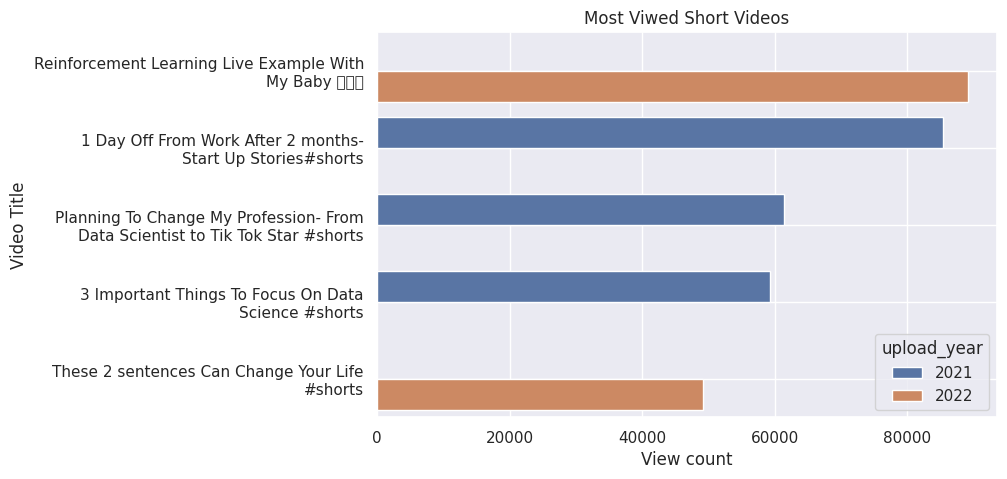

In [43]:
plt.figure(figsize =(8,5))

wrapped_titles = [textwrap.fill(title, width=40) for title in top5["Title"]]

sns.barplot(data = top5 , x = "Views", y = wrapped_titles , hue = "upload_year")

plt.title("Most Viwed Short Videos")
plt.xlabel("View count")
plt.ylabel("Video Title")

plt.grid()
plt.show()

# **Q) Most liked Short videos?**

In [44]:
like5 = short_videos[["Title","Likes","upload_year"]].sort_values("Likes" , ascending = False).head(5)

like5

,Title,Likes,upload_year
696,3 Important Things To Focus On Data Science #s...,3486,2021
787,1 Day Off From Work After 2 months- Start Up S...,3165,2021
380,These 2 sentences Can Change Your Life #shorts,2899,2022
701,Most Important Skills In Data Science For Jobs...,2830,2021
390,You Are The One!!,2695,2022


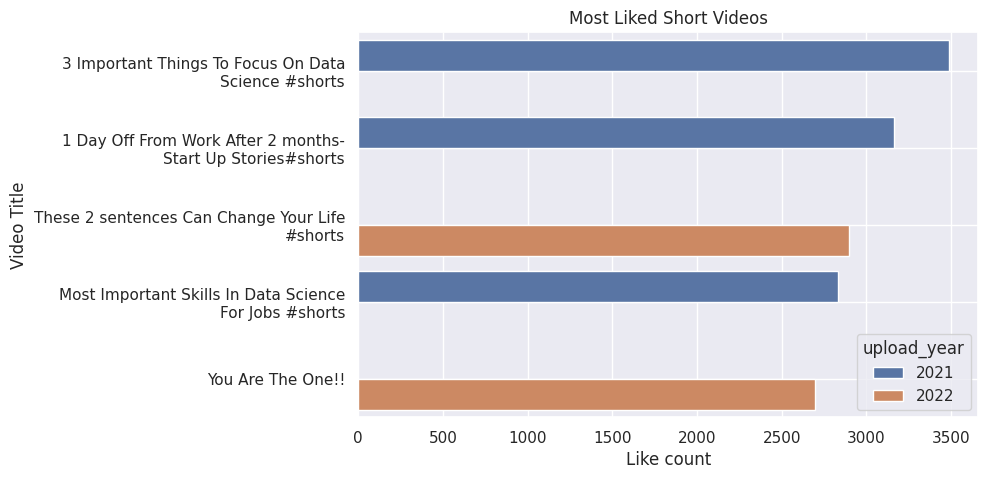

In [45]:
plt.figure(figsize =(8,5))

wrapped_titles = [textwrap.fill(title, width=40) for title in like5["Title"]]

sns.barplot(data = like5 , x = "Likes", y = wrapped_titles , hue = "upload_year")

plt.title("Most Liked Short Videos")
plt.xlabel("Like count")
plt.ylabel("Video Title")

plt.grid()
plt.show()

# **Q) Video Durations for Short Videos?**

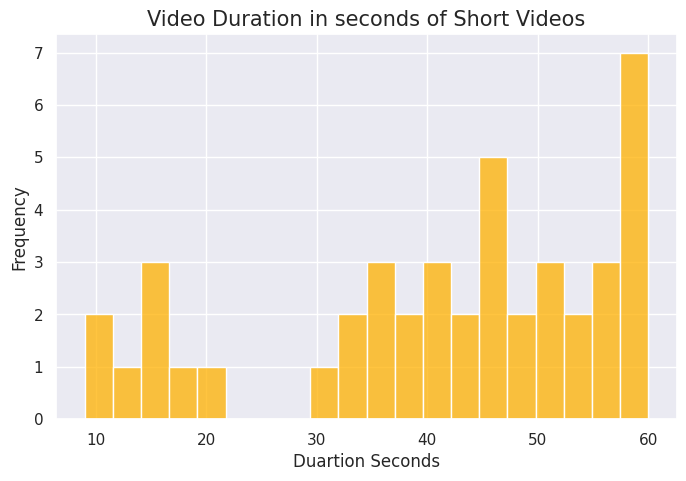

In [46]:
# using histogram with kde plot

plt.figure(figsize=(8, 5))

sns.histplot(data=short_videos, x='duration_seconds', bins=20 , color = "#FFB100")

plt.title("Video Duration in seconds of Short Videos", fontsize = 15)
plt.xlabel("Duartion Seconds")
plt.ylabel("Frequency")

plt.grid()
plt.show()

# **Q) Number of Shorts uploaded on yearly basis ?**

In [47]:
temp_df = short_videos.groupby("upload_year")["Title"].count()

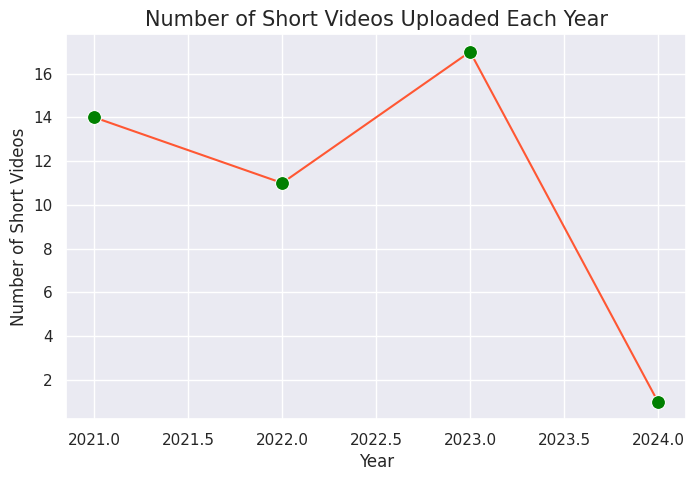

In [48]:
plt.figure(figsize=(8, 5))

sns.lineplot(x=temp_df.index, y=temp_df.values, color="#FF5733" , marker = "o" , markerfacecolor = "green" ,markersize = 10 )

plt.title("Number of Short Videos Uploaded Each Year", fontsize = 15)
plt.xlabel("Year")
plt.ylabel("Number of Short Videos")

plt.grid()
plt.show()

**Conclusion:**


**This project aims to provide a comprehensive analysis of the Krish Naik YouTube channel dataset, helping to uncover valuable insights that can guide content creation and optimization strategies. By understanding audience preferences, engagement patterns, and trends, the Krish Naik team can make informed decisions to enhance their channel's performance and reach.**